import necessary libraries and functions

In [34]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

#Load the train and test dataset

In [2]:
data_1 = pd.read_csv('train.csv')
data_1.head()

,image_names,class
0,0001.jpg,1
1,0002.jpg,1
2,0003.jpg,1
3,0004.jpg,1
4,0005.jpg,1


In [3]:
data_2 = pd.read_csv('test.csv')
data_2.head()

,image_names
0,0001.jpg
1,0002.jpg
2,0003.jpg
3,0004.jpg
4,0005.jpg


Create random number generator

In [4]:
seed = 42
rng = np.random.RandomState(seed)

#distribution of classes in the dataset

In [5]:
data_1['class'].value_counts()

class
1    2440
0     962
Name: count, dtype: int64

#load images and store it in numpy array

In [6]:
# empty list to store the images
X = []
# iterating over each image
for img_name in data_1.image_names:
    # loading the image using its name
    img = plt.imread('images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data_1['class'].values
#y = data_1.class.values

#shape of the image

In [7]:
X.shape

(3402, 224, 224, 3)

visualizing images

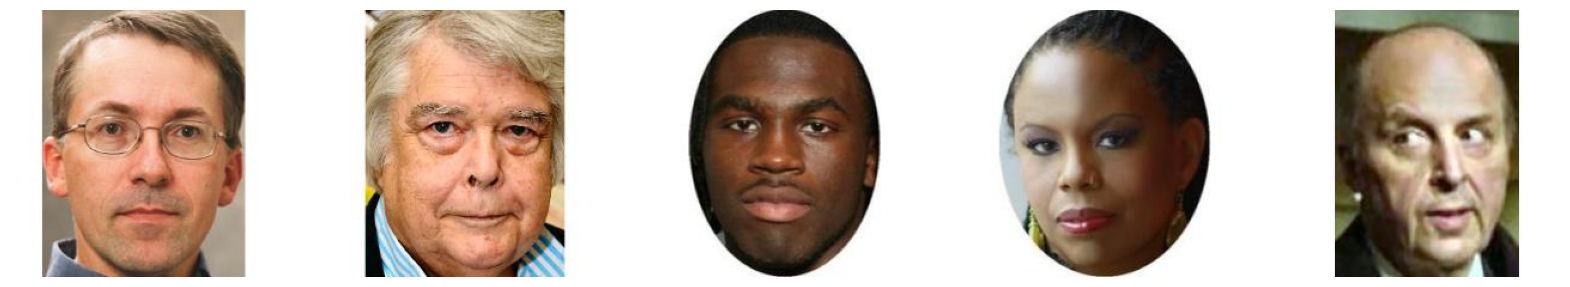

In [8]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*500])
    ax[i].axis('off')

# Pre-processing the dat

converting 3 dimensional image to 1 dimensional image

In [9]:
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(3402, 150528)

#minimum and maximum pixel values of images

In [10]:
X.min(), X.max()

(0, 255)

#minimum and maximum pixel values of images after normalizing

In [11]:
X.min(), X.max()

(0, 255)

#Creating training and validation set

#Creating a training and validation set

In [12]:
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

#Shape of training and validation set

In [13]:
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((2381, 150528), (2381,)), ((1021, 150528), (1021,)))

#Defining the model architecture

# Defining the architecture of the model

In [14]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\Staff\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


#Summary of the model

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

# Compiling  and training the model

In [16]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [17]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - accuracy: 0.6765 - loss: 0.6653 - val_accuracy: 0.7169 - val_loss: 0.5957
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.7083 - loss: 0.6041 - val_accuracy: 0.7169 - val_loss: 0.5957
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.7195 - loss: 0.5935 - val_accuracy: 0.7169 - val_loss: 0.5957
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.7232 - loss: 0.5898 - val_accuracy: 0.7169 - val_loss: 0.5953
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.7206 - loss: 0.5926 - val_accuracy: 0.7169 - val_loss: 0.5951
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.7274 - loss: 0.5855 - val_accuracy: 0.7169 - val_loss: 0.5957
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.7194 - loss: 0.5940 - val_accuracy: 0.7169 - val_loss: 0.5957
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.7182 - loss: 0.5947 - val_accuracy: 0.

# Evaluating model performance

Getting predictions in the form of class as well as probabilities

In [18]:
predictions_probabilities = model.predict(X_valid)
predictions = predictions_probabilities.argmax(axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


#Accuracy on validation set

In [19]:
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, predictions)*100, '%')

Accuracy on validation set: 28.305582761998043 %


Summarize history for loss

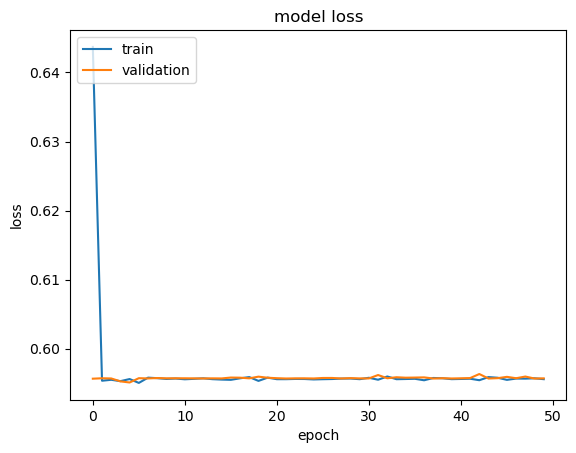

In [20]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Summarize history for accuracy

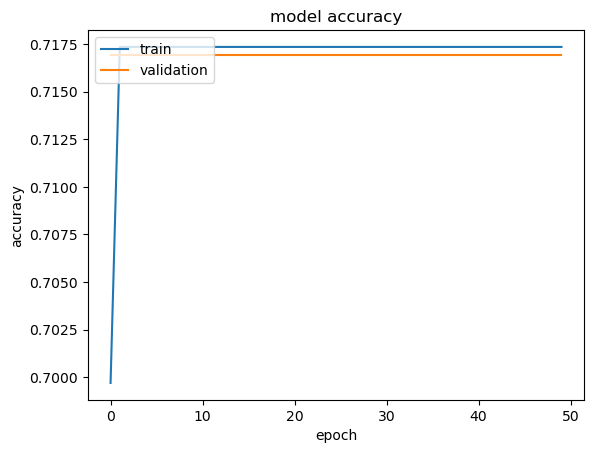

In [21]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model is [71] % sure that it is female
And actual class is  0


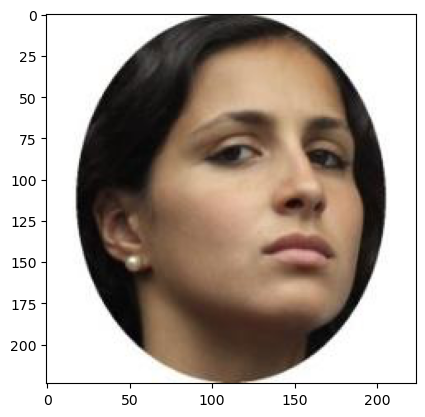

In [22]:
# pull out the original images from the data which correspond to the validation data
_, valid_Gender, _, valid_y = train_test_split(data_1.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_Gender)))

# get the corresponding image name and probability
img_name = valid_Gender[index]
prob = (predictions_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is female')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)

Changing activation function of hidden layer

Using relu as activation function in hidden layer

In [23]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\Staff\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


#Compiling the model

In [24]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

#Summary of the model

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#Training the model for 50 epochs

In [27]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.5682 - loss: 2046461.7500 - val_accuracy: 0.7150 - val_loss: 0.6859
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.7251 - loss: 0.6815 - val_accuracy: 0.7150 - val_loss: 0.6782
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.7234 - loss: 2.3705 - val_accuracy: 0.7160 - val_loss: 0.6720
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.7091 - loss: 0.6697 - val_accuracy: 0.7160 - val_loss: 0.6655
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.7362 - loss: 0.6593 - val_accuracy: 0.7160 - val_loss: 0.6596
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.7114 - loss: 0.6577 - val_accuracy: 0.7160 - val_loss: 0.6543
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.7240 - loss: 0.6499 - val_accuracy: 0.7160 - val_loss: 0.6494
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.7085 - loss: 0.6488 - val_accura

Accuracy on validation set

In [27]:
import numpy as np

raw_predictions = model.predict(X_valid)
predicted_classes = np.argmax(raw_predictions, axis=1)

accuracy = np.mean(predicted_classes == y_valid)
print('Accuracy on validation set:', accuracy, '%')

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Accuracy on validation set: 0.28305582761998044 %


Summarize history for loss

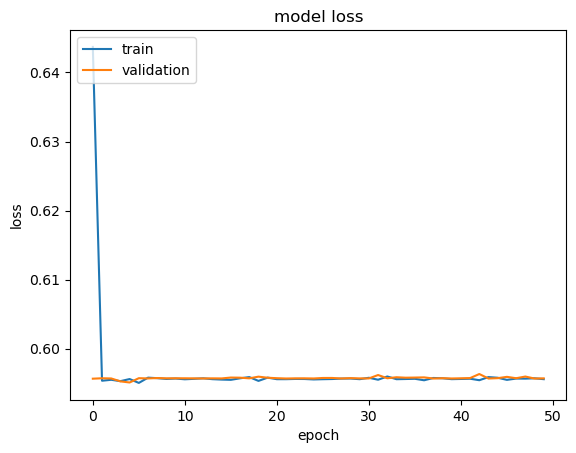

In [28]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Increase hidden neurons

In [29]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

#Compiling the model

In [30]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

#Model summary

In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1024)                │     154,141,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,142,721 (588.01 MB)

 Trainable params: 154,142,721 (588.01 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6614 - loss: 0.6768 - val_accuracy: 0.7169 - val_loss: 0.5906
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7273 - loss: 0.5817 - val_accuracy: 0.7169 - val_loss: 0.5956
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7128 - loss: 0.5961 - val_accuracy: 0.7169 - val_loss: 0.5936
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7094 - loss: 0.6036 - val_accuracy: 0.7169 - val_loss: 0.5978
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7182 - loss: 0.5973 - val_accuracy: 0.7169 - val_loss: 0.6003
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7058 - loss: 0.6039 - val_accuracy: 0.7169 - val_loss: 0.5947
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7204 - loss: 0.5957 - val_accuracy: 0.7169 - val_loss: 0.6094
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7212 - loss: 0.5949 - val_accuracy: 0.7169 - val_loss:

Accuracy on validation set

In [34]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred_probabilities = model.predict(X_valid)
y_pred_classes =np.argmax(y_pred_probabilities, axis=1)
accuracy = accuracy_score(y_valid, y_pred_classes)
print('Accuracy on validation set:', accuracy, '%')

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step
Accuracy on validation set: 0.28305582761998044 %


#Summarize history for loss

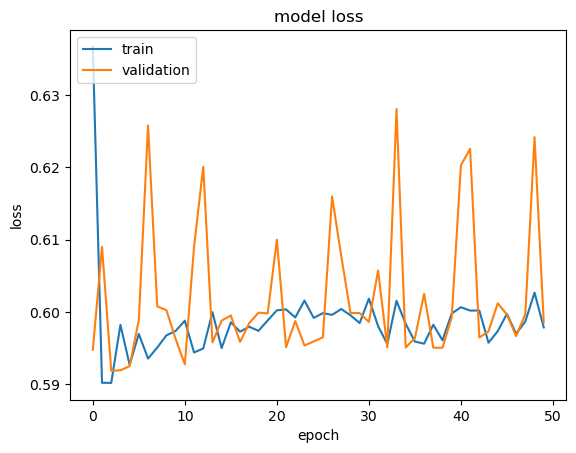

In [35]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Increasing hidden layers

In [36]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\7490\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


#Compiling the model

In [37]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

#Model summary

In [38]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,063,101 (57.46 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.6522 - loss: 0.6393 - val_accuracy: 0.7169 - val_loss: 0.5993
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.7301 - loss: 0.5875 - val_accuracy: 0.7169 - val_loss: 0.5948
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.7312 - loss: 0.5823 - val_accuracy: 0.7169 - val_loss: 0.5953
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.7239 - loss: 0.5890 - val_accuracy: 0.7169 - val_loss: 0.5946
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.7036 - loss: 0.6073 - val_accuracy: 0.7169 - val_loss: 0.5943
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.7093 - loss: 0.6016 - val_accuracy: 0.7169 - val_loss: 0.5947
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.7135 - loss: 0.5980 - val_accuracy: 0.7169 - val_loss: 0.5946
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.7184 - loss: 0.5931 - val_accuracy: 0.

Accuracy on validation set

In [40]:
from sklearn.metrics import accuracy_score
import numpy as np

predictions = model.predict(X_valid)
binary_predictions = np.where(predictions >= 0.5, 1, 0)
accuracy = accuracy_score(y_valid, binary_predictions)
print('Accuracy on validation set:', accuracy*100)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Accuracy on validation set: 71.69441723800196


#Summarize history for loss

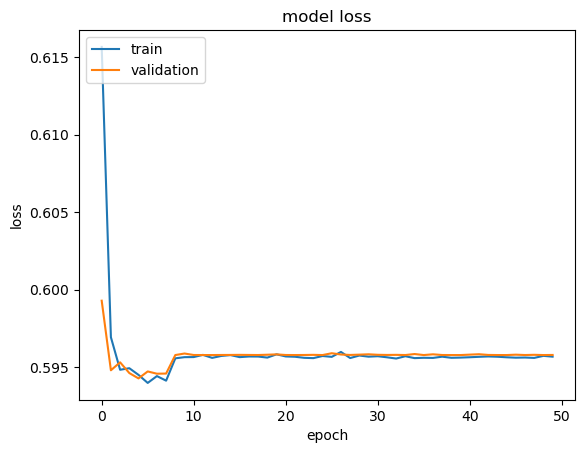

In [41]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Increase number of epochs

In [42]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

C:\Users\7490\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


#Model summary

In [43]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.7193 - loss: 0.6381 - val_accuracy: 0.7169 - val_loss: 0.5980
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.7152 - loss: 0.5986 - val_accuracy: 0.7169 - val_loss: 0.5956
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.7282 - loss: 0.5856 - val_accuracy: 0.7169 - val_loss: 0.5957
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.7281 - loss: 0.5856 - val_accuracy: 0.7169 - val_loss: 0.5961
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.7245 - loss: 0.5894 - val_accuracy: 0.7169 - val_loss: 0.5957
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.7205 - loss: 0.5929 - val_accuracy: 0.7169 - val_loss: 0.5956
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.7271 - loss: 0.5867 - val_accuracy: 0.7169 - val_loss: 0.5958
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.7216 - loss: 0.5918 - val_accu

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.7162 - loss: 0.5967 - val_accuracy: 0.7169 - val_loss: 0.5958
Epoch 52/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.7118 - loss: 0.6010 - val_accuracy: 0.7169 - val_loss: 0.5957
Epoch 53/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.7153 - loss: 0.5977 - val_accuracy: 0.7169 - val_loss: 0.5958
Epoch 54/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.7052 - loss: 0.6074 - val_accuracy: 0.7169 - val_loss: 0.5958
Epoch 55/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.7078 - loss: 0.6046 - val_accuracy: 0.7169 - val_loss: 0.5959
Epoch 56/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.7013 - loss: 0.6108 - val_accuracy: 0.7169 - val_loss: 0.5961
Epoch 57/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.7167 - loss: 0.5967 - val_accuracy: 0.7169 - val_loss: 0.5957
Epoch 58/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.7274 - loss: 0.5862 - val_accuracy:

Accuracy on validation set

In [45]:
from sklearn.metrics import accuracy_score


predictions = model.predict(X_valid)


binary_predictions = (predictions >= 0.5).astype(int)


accuracy = accuracy_score(y_valid, binary_predictions)

print('Accuracy on validation set:', accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Accuracy on validation set: 0.7169441723800196


#Summarize history for loss

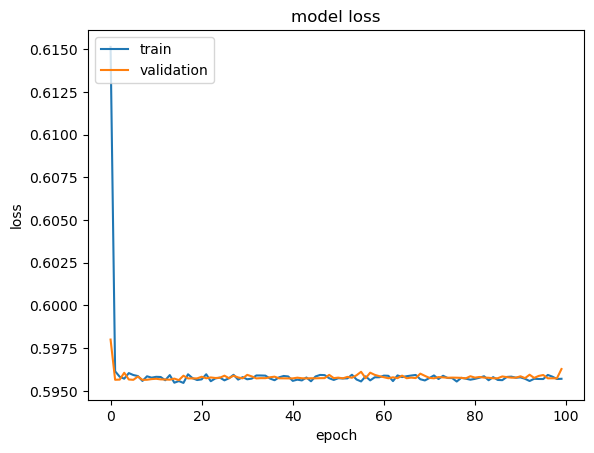

In [46]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Changing the optimizer

Importing adam optimizer from keras optimizer module 

In [47]:
from keras.optimizers import Adam

#Defining the adam optimizer and setting the learning rate as 10^-5

In [48]:
adam = adam = Adam(learning_rate=1e-5)

#Change optimizer

In [49]:
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

C:\Users\7490\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model summary

In [50]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,063,101 (57.46 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - accuracy: 0.6555 - loss: 0.6448 - val_accuracy: 0.7169 - val_loss: 0.6223
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 231ms/step - accuracy: 0.7108 - loss: 0.6237 - val_accuracy: 0.7169 - val_loss: 0.6175
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.7283 - loss: 0.6117 - val_accuracy: 0.7169 - val_loss: 0.6142
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.7293 - loss: 0.6077 - val_accuracy: 0.7169 - val_loss: 0.6118
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 231ms/step - accuracy: 0.7220 - loss: 0.6081 - val_accuracy: 0.7169 - val_loss: 0.6088
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 231ms/step - accuracy: 0.7147 - loss: 0.6094 - val_accuracy: 0.7169 - val_loss: 0.6071
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - accuracy: 0.7144 - loss: 0.6082 - val_accuracy: 0.7169 - val_loss: 0.6055
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - accuracy: 0.7162 - loss: 0.6045 - val_accu

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - accuracy: 0.7091 - loss: 0.6004 - val_accuracy: 0.7169 - val_loss: 0.5938
Epoch 52/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 0.7056 - loss: 0.6038 - val_accuracy: 0.7169 - val_loss: 0.5940
Epoch 53/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - accuracy: 0.7147 - loss: 0.5961 - val_accuracy: 0.7169 - val_loss: 0.5935
Epoch 54/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - accuracy: 0.7181 - loss: 0.5918 - val_accuracy: 0.7169 - val_loss: 0.5930
Epoch 55/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.7160 - loss: 0.5938 - val_accuracy: 0.7169 - val_loss: 0.5931
Epoch 56/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - accuracy: 0.7135 - loss: 0.5959 - val_accuracy: 0.7169 - val_loss: 0.5928
Epoch 57/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.7229 - loss: 0.5871 - val_accuracy: 0.7169 - val_loss: 0.5928
Epoch 58/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 200ms/step - accuracy: 0.7166 - loss: 0.5934 - val_accuracy:

Accuracy on validation set

In [ ]:
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Summarize history for loss

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Summarize history for accuracy

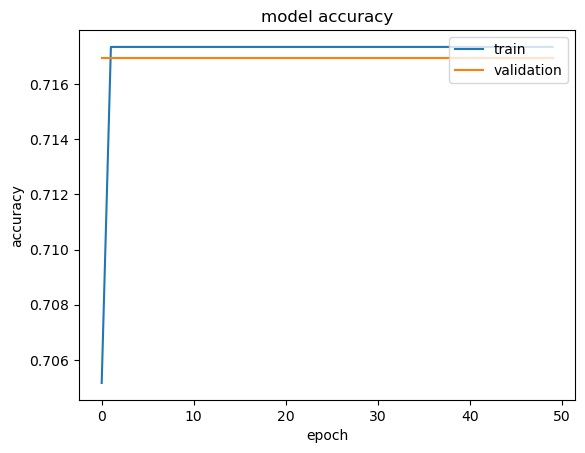

In [35]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()